# Problem Statement

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# Data Collection:
The data was collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")


%matplotlib inline

In [3]:
df = pd.read_csv("./Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

### Handling Missing Values
- Handling Missing values
- Handling Duplicate values
- Check data type
- Understand the data distribution

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['MaritalStatus'] = df["MaritalStatus"].replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [9]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100 , 5), "% missing value")

Age 4.62357 % missing value
TypeofContact 0.51146 % missing value
DurationOfPitch 5.13502 % missing value
NumberOfFollowups 0.92062 % missing value
PreferredPropertyStar 0.53191 % missing value
NumberOfTrips 2.86416 % missing value
NumberOfChildrenVisiting 1.35025 % missing value
MonthlyIncome 4.76678 % missing value


### Imputing Null Values
- Impute Median value for Age column
- Impute Mode for Type of Contact column
- Impote Median for Duration of Pitch column
- Impute Mode for NumberOfFollowups column as it is Discrete feature
- Impute Mode for Preferred Property Star column
- Impute Median for NumberOfTrips column
- Impute Mode for NumberOfChildren Visiting column
- Impute Mode for Monthly Income column

In [18]:
##Age
df['Age'].fillna(df['Age'].median(), inplace=True)

#Type of Contact
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0], inplace=True)

##Duration of Pitch 
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(), inplace=True)

##Number of follow ups
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0], inplace=True)

##Prefered Property star
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0], inplace=True)

##Number of Trips
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(), inplace=True)

##Number Of Childern
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)

##Monthly Income
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)

In [19]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [20]:
df.drop('CustomerID', inplace=True, axis=1)

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [22]:
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]

In [23]:
df.drop(columns=["NumberOfPersonVisiting", "NumberOfChildrenVisiting"], inplace=True, axis=1)

In [26]:
##get all numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Number of neumerical features: {len(numeric_features)}")

Number of neumerical features: 12


In [27]:
##get all categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]
print(f"Number of categorical features: {len(categorical_features)}")

Number of categorical features: 6


In [30]:
##Discrete features
discrete_features = [feature for feature in numeric_features if len(df[feature].unique() )<= 25 ]
print(f"Number of discrete fearures: {len(discrete_features)}")

Number of discrete fearures: 9


In [31]:
##Continuous features
continous_features = [feature for feature in numeric_features if feature not in discrete_features]
print(f"Number of Continious features: {len(continous_features)}")

Number of Continious features: 3


In [32]:
X = df.drop("ProdTaken", axis=1)
y = df["ProdTaken"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=112)

In [34]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [38]:
models={
    "Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Model training
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #Training set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_recauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performace
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_recauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print("Model performance for Training set")

    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_recauc_score))

    print("--------------------------------------")

    print("Model performance for Testing set")
    
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_recauc_score))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------------
Model performance for Testing set
- Accuracy: 0.9202
- F1 Score: 0.9133
- Precision: 0.9375
- Recall: 0.6089
- Roc Auc Score: 0.7998




In [45]:
##Hyperparameter tuning
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features": [5,7,"auto",8],
    "min_samples_split": [2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [46]:
randomCV_models = [
    ("RF", RandomForestClassifier(), rf_params)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomCV_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100,cv=3, verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------ Best Params for {model_name} ------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=500; total time=   0.9s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_es

In [49]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=7, max_depth=15)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Model training
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #Training set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_recauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performace
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_recauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print("Model performance for Training set")

    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_recauc_score))

    print("--------------------------------------")

    print("Model performance for Testing set")
    
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_recauc_score))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 0.9991
- F1 Score: 0.9991
- Precision: 1.0000
- Recall: 0.9954
- Roc Auc Score: 0.9977
--------------------------------------
Model performance for Testing set
- Accuracy: 0.9223
- F1 Score: 0.9167
- Precision: 0.9153
- Recall: 0.6384
- Roc Auc Score: 0.8125




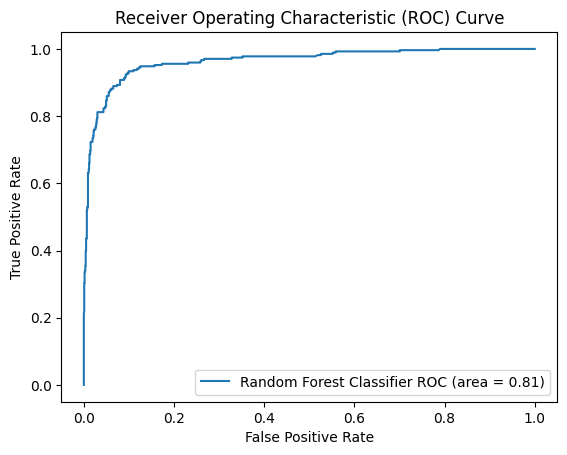

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()


# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        "model": RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=7, max_depth=15),
        "acu": 0.8125
    }
]

# Create a loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    plt.plot(fpr, tpr, label="%s ROC (area = %0.2f)" % (algo['label'], algo['acu']))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
